In [1]:
import pandas as pd 
import numpy as np
# libraries for data visualization
import matplotlib.pyplot as plt
# libraries for model selection
from sklearn.ensemble import ExtraTreesClassifier
# libraries for splitting data
from sklearn.model_selection import train_test_split
# libraries for model evaluation
from sklearn.metrics import accuracy_score
# parameter tuning for Model
from sklearn.model_selection import GridSearchCV



In [3]:
csv = pd.read_csv('bankruptcy.csv')
df = csv.drop([' Net Income Flag',' Liability-Assets Flag'], axis=1)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [4]:
df.dtypes


Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Net Income to Stockholder's Equity                         float64
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Equity to Liability                                        float64
Length: 94, dtype: object

In [5]:
missing_values = df.isnull().sum()

if missing_values.any(): # Check for missing values
    print('Missing values found')
    df.dropna(inplace=True)  # Remove missing values
    print(missing_values, 'missing values removed')
    # or data.fillna(method='ffill', inplace=True) to fill missing values


In [6]:
data = df.iloc[:, 1:]  # Selects all rows and columns from the second to the last
data.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [7]:
labels = df['Bankrupt?']
print(labels.value_counts())

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)  # Adjust the test_size as needed


In [9]:
import warnings
warnings.filterwarnings('ignore')

# Model Before Hyperparameter Tuning
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100}%')


Accuracy: 97.0307917888563%


In [10]:
param_grid = {
    'n_estimators': [5, 10, 50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 50, 100], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}


In [11]:
import warnings
warnings.filterwarnings('ignore')
grid_search = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 50, 100, 200, 300]})

In [12]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [13]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Assuming you have already performed the grid search
best_model = grid_search.best_estimator_

# Evaluate on the validation set
val_predictions = best_model.predict(X_test)
val_accuracy = accuracy_score(y_test, val_predictions)

# Check if the accuracy is above 97%
if val_accuracy >= 0.97:
    print("Best Parameters:", grid_search.best_params_)
    print(f"Validation Accuracy: {val_accuracy * 100}%")
else:
    print("No model found with accuracy above 97%.")


No model found with accuracy above 97%.


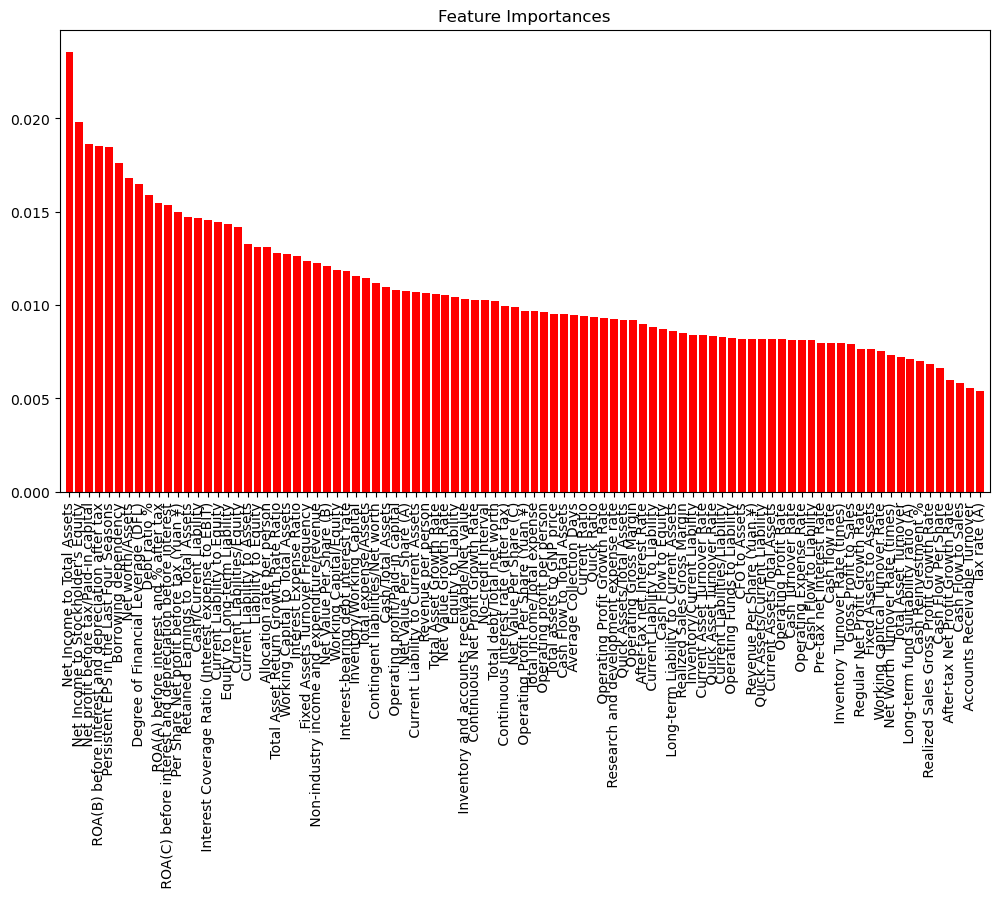

In [14]:

feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


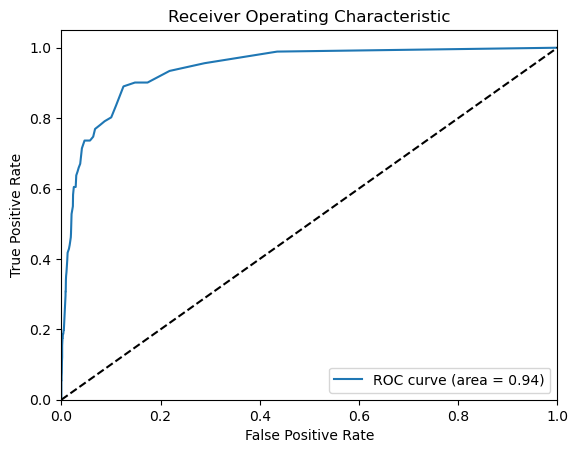

In [15]:
from sklearn.metrics import roc_curve, auc

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


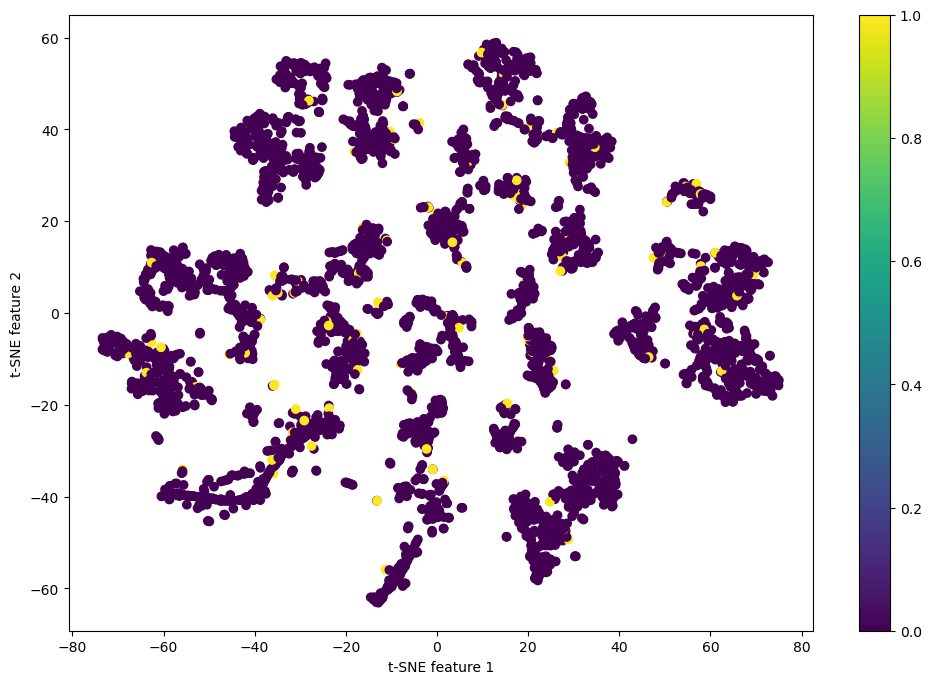

In [16]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X_train)

plt.figure(figsize=(12, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train)
plt.colorbar()
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()
